라이브러리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from matplotlib import font_manager, rc
%matplotlib inline 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 데이터 삽입

## 데이터 불러오기

In [ ]:
df = pd.read_csv('data\heart.csv', encoding='utf-8')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data info

- **age** = 나이 (Age of the patient)
- **sex** = 성별 (Sex of the patient), (1 = male; 0 = female)
- **cp** = 흉통 (Chest pain type), (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic)
- **trbps** = 안정기 혈압 (resting blood pressure (in mm Hg))
- **chol** = 콜레스테롤 수치 (cholesterol in mg/dl fetched via BMI sensor)
- **fbs** = 공복혈당 (fasting blood sugar > 120 mg/dl), (1 = true; 0 = false)
- **restecg** = 안정기 심전도 (resting electrocardiographic results), (0 = Normal; 1 = ST-T wave normality; 2 = Left ventricular hypertrophy)
- **thalachh** = 최대 심박수 (maximum heart rate achieved)
- **exng** = 운동유발성 협심증 (exercise induced angina), (1 = yes; 0 = no)
- **oldpeak** = 운동휴식 ST 하강 (ST depression induced by exercise relative to rest)
- **slp** = 운동부하 ST 분절 기울기 (the slope of the peak exercise ST segment), ( 0 = downsloping; 1 = flat; 2 = upsloping)
- **caa** = 주요 혈관 수 (Number of major vessels)
- **thall** = 탈륨 스트레스 테스트 (Thallium Stress Test result), (0 = non_test; 1 = fixed defect; 2 = normal; 3 = reversable defect)
- **output** = Target variable, (0= less chance of heart attack; 1= more chance of heart attack)

## 데이터 확인

In [ ]:
# Shape 확인

df.shape

(303, 14)

In [ ]:
# Type 확인

df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
# Null 값 확인

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
# 자료 통계 확인

df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# dataframe 분리

numericals = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'] # 수치형 자료
categoricals = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'] # 범주형 자료
targets = ["output"]

df_cat = df[categoricals]
df_num = df[numericals]
df_tar = df[targets]

In [ ]:
# 수치형 자료 통계

df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## 수치 데이터 분석

Text(0, 0.5, '')

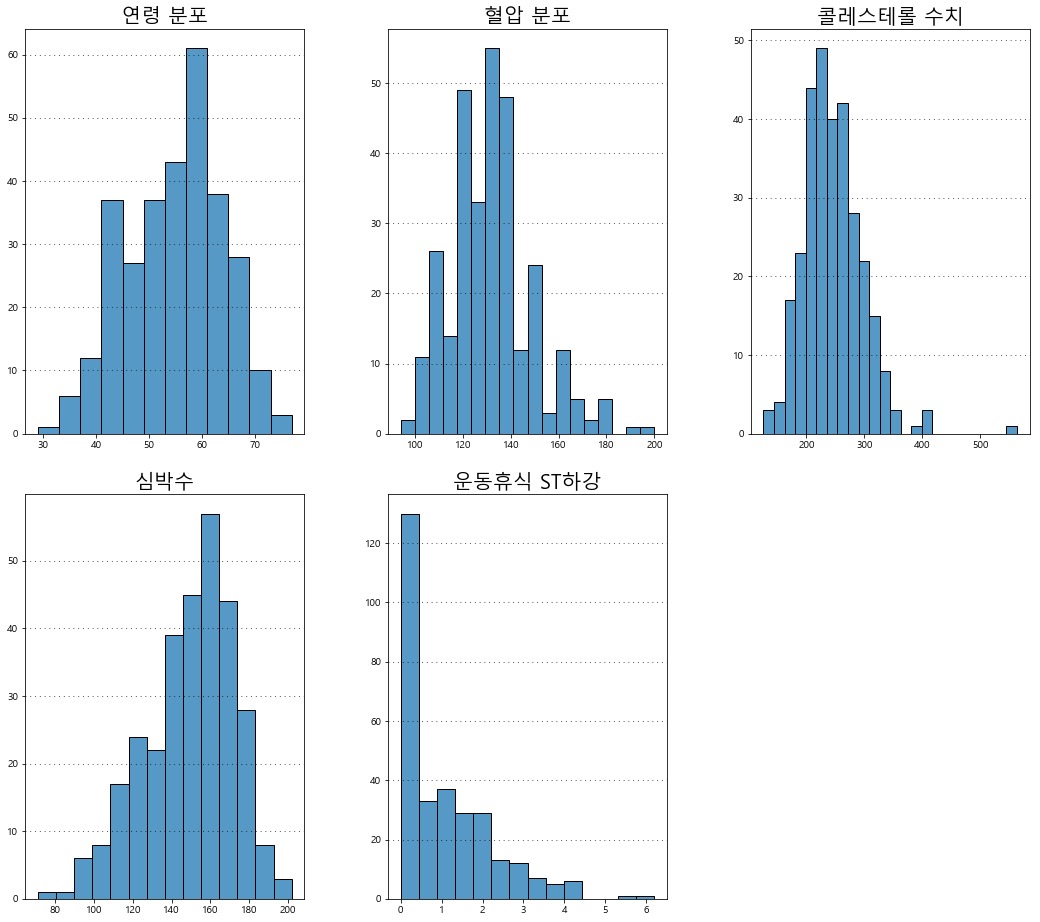

In [ ]:
# 2x3 페이지
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])

# 환자 연령 분포
sns.histplot(ax=ax1,x=df['age'])
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_title('연령 분포', fontsize=20)
ax1.set_xlabel('')
ax1.set_ylabel('')

# 환자 혈압 분포 
sns.histplot(ax=ax2,x=df['trtbps'])
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.set_title('혈압 분포', fontsize=20)
ax2.set_xlabel('')
ax2.set_ylabel('')

# 환자 콜레스테롤 수치
sns.histplot(ax=ax3,x=df['chol'])
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.set_title('콜레스테롤 수치', fontsize=20)
ax3.set_xlabel('')
ax3.set_ylabel('')

# 환자 심박수
sns.histplot(ax=ax4,x=df['thalachh'])
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax4.set_title('심박수', fontsize=20)
ax4.set_xlabel('')
ax4.set_ylabel('')

# 운동휴식 ST 하강 
sns.histplot(ax=ax5,x=df['oldpeak'])
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.set_title('운동휴식 ST하강', fontsize=20)
ax5.set_xlabel('')
ax5.set_ylabel('')

## 범주 데이터 분석

In [ ]:
df_cat.head(0)

,sex,cp,fbs,restecg,exng,slp,caa,thall


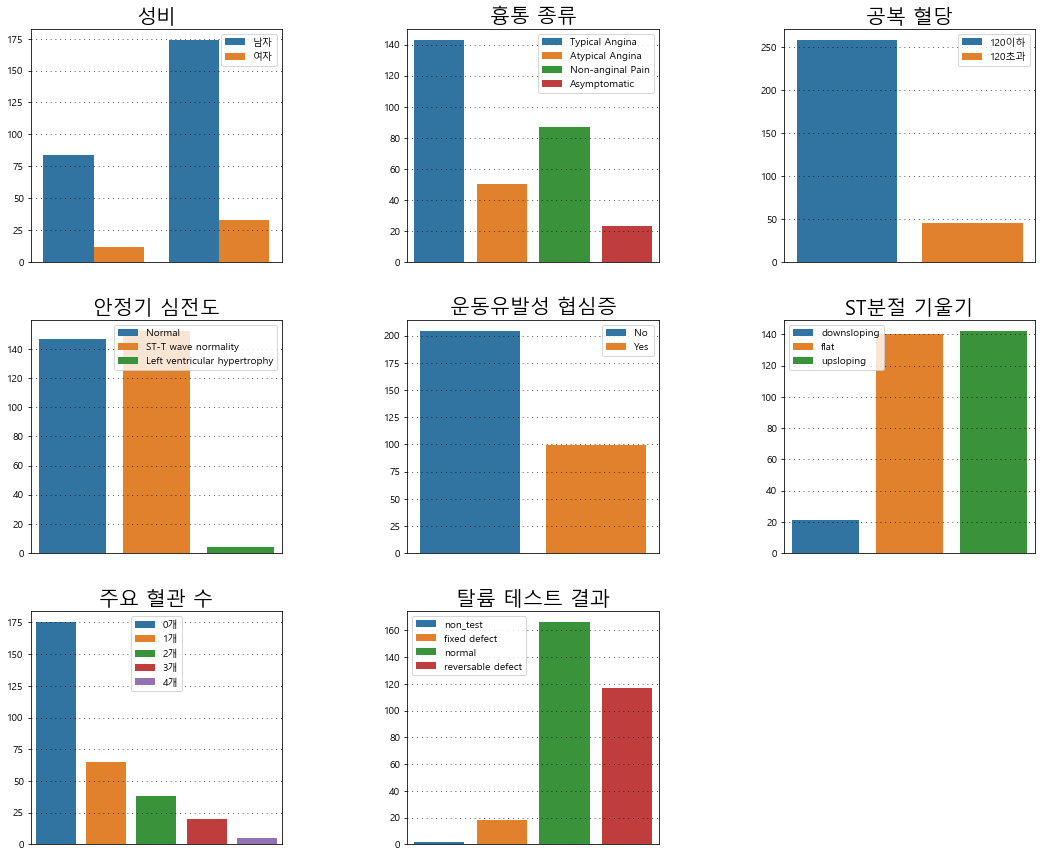

In [ ]:
# 3x3 페이지
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])
ax8 = fig.add_subplot(gs[2,1])


# 환자 성비 분포
sns.countplot(ax=ax1, data=df, x='sex', hue='sex')
sns.countplot(ax=ax1, data=df, x='sex')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_title('성비', fontsize=20)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.legend(['남자', '여자'], fontsize= 10)

# 환자 흉통 종류 분포
sns.countplot(ax=ax2, data=df, x='cp', hue='cp')
sns.countplot(ax=ax2, data=df, x='cp')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_title('흉통 종류', fontsize=20)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.legend(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], fontsize= 10)

# 공복 혈당
sns.countplot(ax=ax3, data=df, x='fbs', hue='fbs')
sns.countplot(ax=ax3, data=df, x='fbs')
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax3.set_title('공복 혈당', fontsize=20)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticks([])
ax3.legend(['120이하', '120초과'], fontsize= 10)

# 안정기 심전도
sns.countplot(ax=ax4, data=df, x='restecg', hue='restecg')
sns.countplot(ax=ax4, data=df, x='restecg')
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax4.set_title('안정기 심전도', fontsize=20)
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.set_xticks([])
ax4.legend(['Normal', 'ST-T wave normality', 'Left ventricular hypertrophy'], fontsize= 10)

# 운동유발성 협심증 
sns.countplot(ax=ax5, data=df, x='exng', hue='exng')
sns.countplot(ax=ax5, data=df, x='exng')
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax5.set_title('운동유발성 협심증', fontsize=20)
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.set_xticks([])
ax5.legend(['No', 'Yes'], fontsize= 10)

# 운동부하 ST분절 기울기 
sns.countplot(ax=ax6, data=df, x='slp', hue='slp')
sns.countplot(ax=ax6, data=df, x='slp')
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax6.set_title('ST분절 기울기', fontsize=20)
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.set_xticks([])
ax6.legend(['downsloping', 'flat', 'upsloping'], fontsize= 10)

# 주요 혈관 수
sns.countplot(ax=ax7, data=df, x='caa', hue='caa')
sns.countplot(ax=ax7, data=df, x='caa')
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax7.set_title('주요 혈관 수', fontsize=20)
ax7.set_xlabel('')
ax7.set_ylabel('')
ax7.set_xticks([])
ax7.legend(['0개', '1개', '2개', '3개', '4개'], fontsize= 10)

# 탈륨 스트레스 테스트 
sns.countplot(ax=ax8, data=df, x='thall', hue='thall')
sns.countplot(ax=ax8, data=df, x='thall')
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax8.set_title('탈륨 테스트 결과', fontsize=20)
ax8.set_xlabel('')
ax8.set_ylabel('')
ax8.set_xticks([])
ax8.legend(['non_test', 'fixed defect', 'normal', 'reversable defect'], fontsize= 10)

## target 시각화

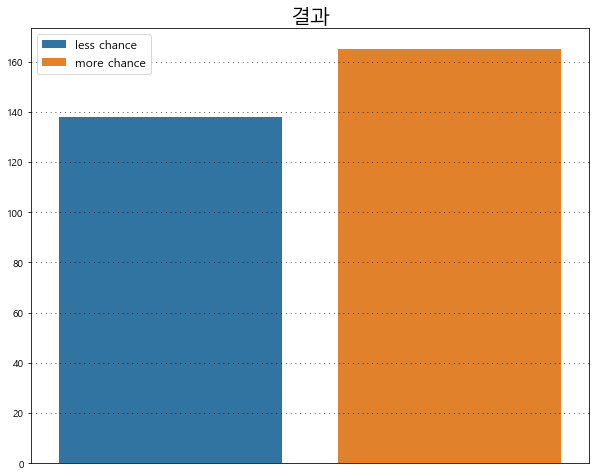

In [ ]:
plt.figure(figsize=(10,8))
plt.grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))

sns.countplot(data=df, x='output', hue='output')
sns.countplot(data=df, x='output')

plt.title('결과', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.rc('ytick', labelsize=20)

plt.legend(['less chance', 'more chance'], fontsize= 12)

plt.show()

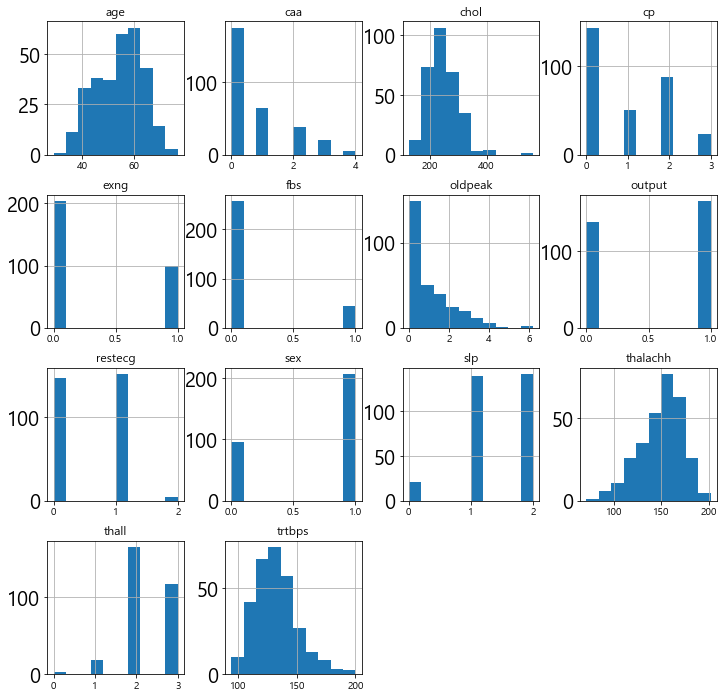

In [ ]:
# plot histograms for each variable
df.hist(figsize = (12, 12))
plt.show()

# 통계분석

## 수치 데이터와 결과 분석


In [ ]:
df_num.head(0)

,age,trtbps,chol,thalachh,oldpeak


[]

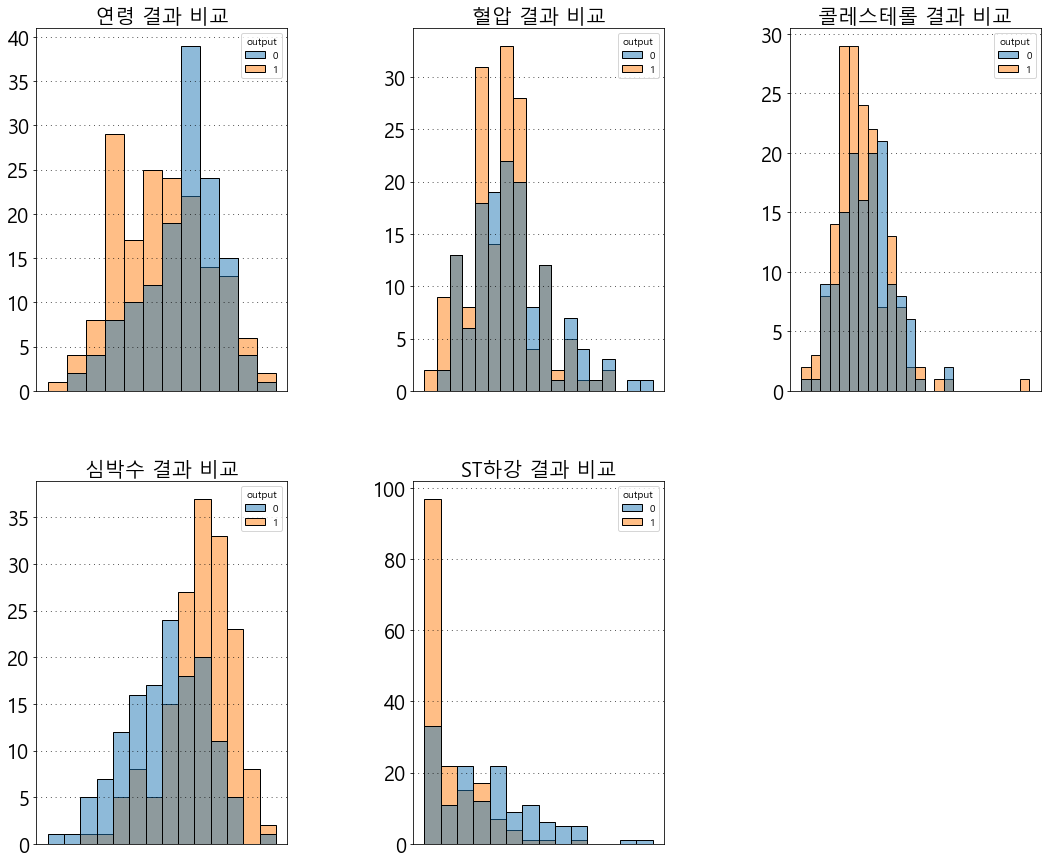

In [ ]:
# 2x3 페이지
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])

# 연령 결과 비교
sns.histplot(ax=ax1, data=df, x='age',hue="output")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_title('연령 결과 비교', fontsize=20)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks([])

# 혈압 결과 비교
sns.histplot(ax=ax2, data=df, x='trtbps',hue="output")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_title('혈압 결과 비교', fontsize=20)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks([])

# 콜레스테롤 결과 비교
sns.histplot(ax=ax3, data=df, x='chol',hue="output")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax3.set_title('콜레스테롤 결과 비교', fontsize=20)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticks([])

# 심박수 결과 비교
sns.histplot(ax=ax4, data=df, x='thalachh',hue="output")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax4.set_title('심박수 결과 비교', fontsize=20)
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.set_xticks([])

# ST하강 결과 비교
sns.histplot(ax=ax5, data=df, x='oldpeak',hue="output")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax5.set_title('ST하강 결과 비교', fontsize=20)
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.set_xticks([])

## 범주 데이터와 결과 분석

In [ ]:
df_cat.head(0)

,sex,cp,fbs,restecg,exng,slp,caa,thall


[]

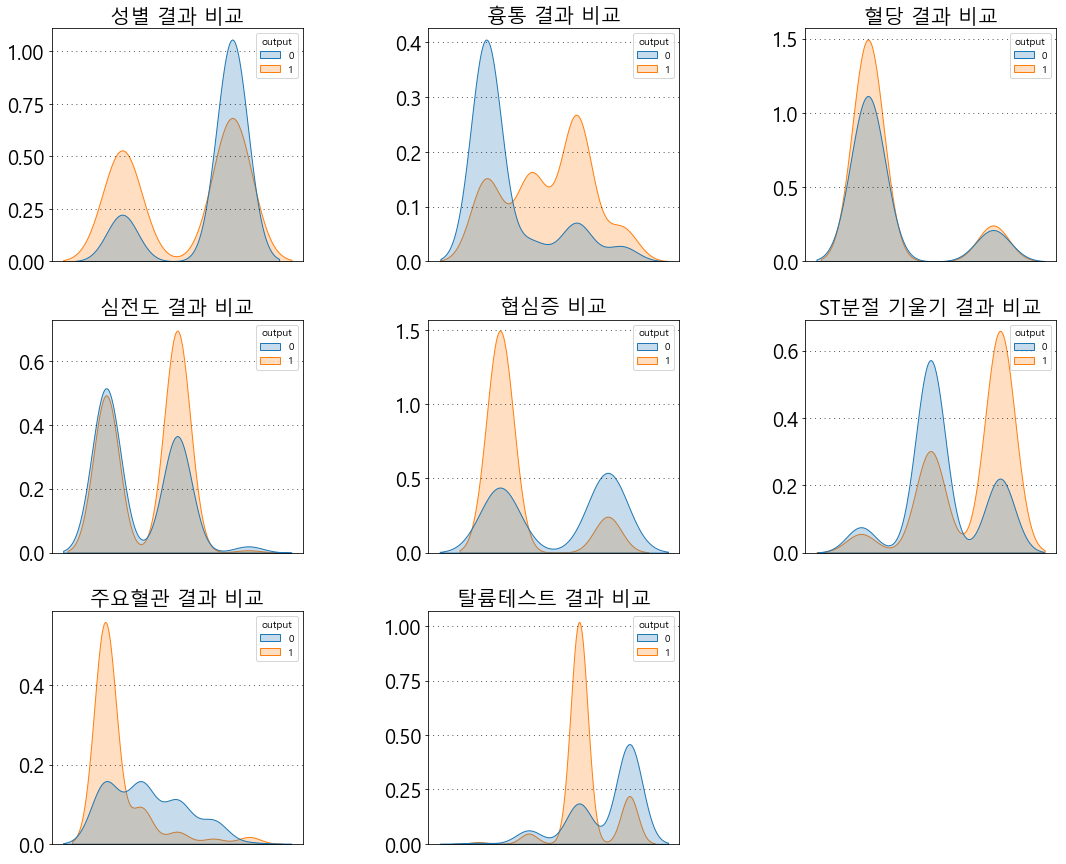

In [ ]:
# 3x3 페이지
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])
ax8 = fig.add_subplot(gs[2,1])

# 성별 결과 비교
sns.kdeplot(ax=ax1, data=df, x='sex',hue="output", fill=True)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_title('성별 결과 비교', fontsize=20)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks([])

# 흉통 결과 비교
sns.kdeplot(ax=ax2, data=df, x='cp',hue="output", fill=True)
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_title('흉통 결과 비교', fontsize=20)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks([])

# 혈당 결과 비교
sns.kdeplot(ax=ax3, data=df, x='fbs',hue="output", fill=True)
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax3.set_title('혈당 결과 비교', fontsize=20)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticks([])

# 심전도 결과 비교
sns.kdeplot(ax=ax4, data=df, x='restecg',hue="output", fill=True)
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax4.set_title('심전도 결과 비교', fontsize=20)
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.set_xticks([])

# 협심증 비교
sns.kdeplot(ax=ax5, data=df, x='exng',hue="output", fill=True)
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax5.set_title('협심증 비교', fontsize=20)
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.set_xticks([])

# ST분절 기울기 결과 비교
sns.kdeplot(ax=ax6, data=df, x='slp',hue="output", fill=True)
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax6.set_title('ST분절 기울기 결과 비교', fontsize=20)
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.set_xticks([])

# 주요혈관 결과 비교
sns.kdeplot(ax=ax7, data=df, x='caa',hue="output", fill=True)
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax7.set_title('주요혈관 결과 비교', fontsize=20)
ax7.set_xlabel('')
ax7.set_ylabel('')
ax7.set_xticks([])

# 탈륨테스트 결과 비교
sns.kdeplot(ax=ax8, data=df, x='thall',hue="output", fill=True)
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax8.set_title('탈륨테스트 결과 비교', fontsize=20)
ax8.set_xlabel('')
ax8.set_ylabel('')
ax8.set_xticks([])

## 모든 분포표 전체 보기

In [ ]:
sns.pairplot(df,hue='output')
plt.show()

# 상관관계 분석

## 상관계수 계산

In [ ]:
# 전체 계수

df_corr = df.corr().transpose()
df_corr

In [ ]:
# 수치형 계수

df_corr_num = df[numericals].corr().transpose()
df_corr_num

In [ ]:
# 범주형 계수

df_corr_cate = df[categoricals].corr().transpose()
df_corr_cate

## 상관계수 시각화

In [ ]:
# 수치형 계수

fig = plt.figure(figsize=(10,10))
mask = np.zeros_like(df_corr_num, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr_num, 
            cmap = 'coolwarm', 
            annot = True,
            mask=mask,
            linewidths=1,
           )  
plt.show()

In [ ]:
# 범주형 계수

fig = plt.figure(figsize=(10,10))
mask = np.zeros_like(df_corr_cate, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr_cate, 
            cmap = 'coolwarm', 
            annot = True,
            mask=mask,
            linewidths=1,
           )  
plt.show()

In [ ]:
# 전체 계수

fig = plt.figure(figsize=(10,10))
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, 
            cmap = 'coolwarm', 
            annot = True,
            mask=mask,
            linewidths=1,
           )  
plt.show()

# 머신러닝

## Packages

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## 모델 준비

### Train and test split

In [ ]:
# copy해서 target과 분리

df_copy = df.copy()
df_x = df_copy.drop(["output"], axis=1)
df_y = df_copy["output"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=2)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (212, 13)
X_test (91, 13)
y_train (212,)
y_test (91,)


### 데이터 스케일링

In [ ]:
# 수치형 범주형 구분

numericals = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'] # 수치형 자료
categoricals = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'] # 범주형 자료

# 수치형 범주형 scaler 선택
numeric_transformer = StandardScaler() # cf) RobustScaler
categorical_transformer = OneHotEncoder(categories='auto') # categories='auto' : just for ignoring warning messages


preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numericals),
        ('cat', categorical_transformer, categoricals)])

preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)]) # preprocessing-only

In [ ]:
# fit-transform
X_train = preprocessor_pipe.fit_transform(X_train)
X_test = preprocessor_pipe.transform(X_test)

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.313458,-0.211508,-0.824877,0.288433,-0.058741,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.774154,-0.652736,0.642730,-2.000293,0.271144,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.530980,-1.204270,0.128114,0.417984,-0.883455,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.339109,0.450333,-0.691458,0.677085,-0.883455,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.339109,1.001868,0.680849,0.547534,-0.058741,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 모델 적용

In [ ]:
# 모델 적용 함수

def train_and_test(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = round(model.score(X_test, y_test) * 100, 2) # 예측률 출력
    print(str(model).split('(')[0], "정확도 : ", accuracy, "%")
    return prediction

In [ ]:
# Logistic Regression
lr = train_and_test(LogisticRegression())

# SVM
svc = train_and_test(SVC())

# KNN
knn = train_and_test(KNeighborsClassifier(n_neighbors = 4))

# Random Forest
rf = train_and_test(RandomForestClassifier(n_estimators=100))

# Decision Tree
dt = train_and_test(DecisionTreeClassifier(random_state = 100))

# Gradient Boosting
gb = train_and_test(GradientBoostingClassifier(n_estimators = 300, 
                                              max_depth=1, 
                                              subsample=0.8, 
                                              max_features=0.2, 
                                              random_state=42))

LogisticRegression 정확도 :  90.11 %
SVC 정확도 :  91.21 %
KNeighborsClassifier 정확도 :  85.71 %
RandomForestClassifier 정확도 :  86.81 %
DecisionTreeClassifier 정확도 :  82.42 %
GradientBoostingClassifier 정확도 :  90.11 %


## ROC Curve

In [ ]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

# SVM
model_svc = SVC().fit(X_train, y_train)
decision_svc = model_svc.decision_function(X_test)

# KNN
model_knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
probs_knn = model_knn.predict_proba(X_test)[:, 1]

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

# Decision Tree
model_dt = DecisionTreeClassifier(random_state = 100).fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

# Gradient Boosting
model_gb = GradientBoostingClassifier(n_estimators = 300, 
                                     max_depth=1, 
                                     subsample=0.8, 
                                     max_features=0.2, 
                                     random_state=42).fit(X_train, y_train)
probs_gb = model_gb.predict_proba(X_test)[:, 1]


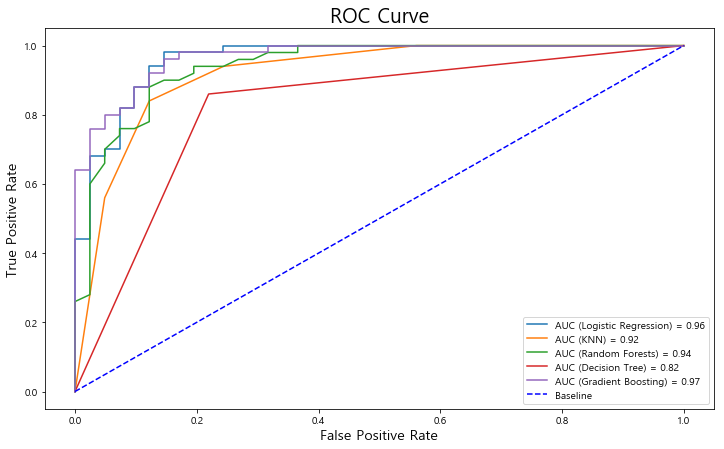

In [ ]:
auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_knn = roc_auc_score(y_test, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn)

auc_rf = roc_auc_score(y_test, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

auc_dt = roc_auc_score(y_test, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)

auc_gb = roc_auc_score(y_test, probs_gb)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, probs_gb)

auc_svc = roc_auc_score(y_test, decision_svc)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, decision_svc)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_gb, tpr_gb, label=f'AUC (Gradient Boosting) = {auc_gb:.2f}')
plt.plot(fpr_svc, tpr_svc, label=f'AUC (SVC) = {auc_gb:.2f}')

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();